In [ ]:
import networkx as nx

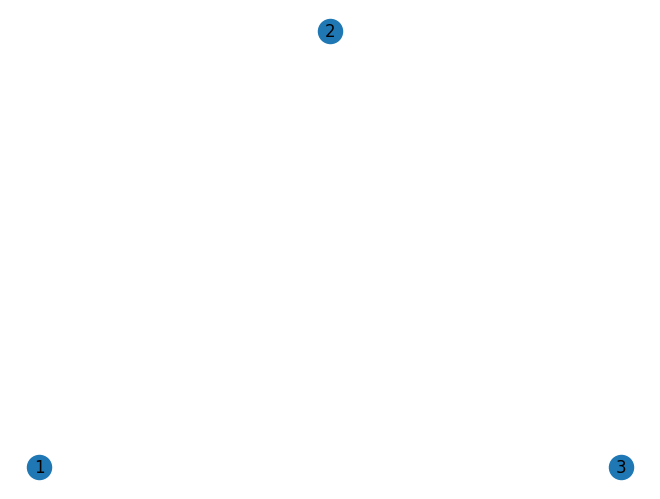

In [ ]:
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with positions
G.add_node(1, pos=(0, 0))
G.add_node(2, pos=(1, 1))
G.add_node(3, pos=(2, 0))

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, pos, with_labels=True)

# Show the plot
plt.show()


In [ ]:
G = nx.Graph()
G.add_nodes_from([0,9])
G.add_edge(1,2,weight=3)
G.add_edge(2,3,weight=1)
G.add_edge(2,4,weight=2)
G.add_edge(4,5,weight=4)
G.add_edge(1,2,weight=3)
G.add_edge(5,6,weight=1)
G.add_edge(5,7,weight=3)
G.add_edge(6,8,weight=6)
G.add_edge(7,8,weight=1)
G.add_edge(8,9,weight=4)


print(nx.dijkstra_path(G, 1, 9))


[1, 2, 4, 5, 7, 8, 9]


{(1, 2): Text(1.5, 1.5, '3'),
 (2, 3): Text(2.5, 0.5, '1'),
 (2, 4): Text(2.5, 1.5, '2'),
 (3, 4): Text(3.0, 0.0, '2'),
 (4, 5): Text(3.5, 1.0, '4'),
 (5, 6): Text(4.5, 2.5, '1'),
 (5, 7): Text(4.5, 1.5, '3'),
 (6, 8): Text(5.5, 2.5, '6'),
 (7, 8): Text(5.5, 1.5, '1'),
 (8, 9): Text(6.0, 2.5, '4')}

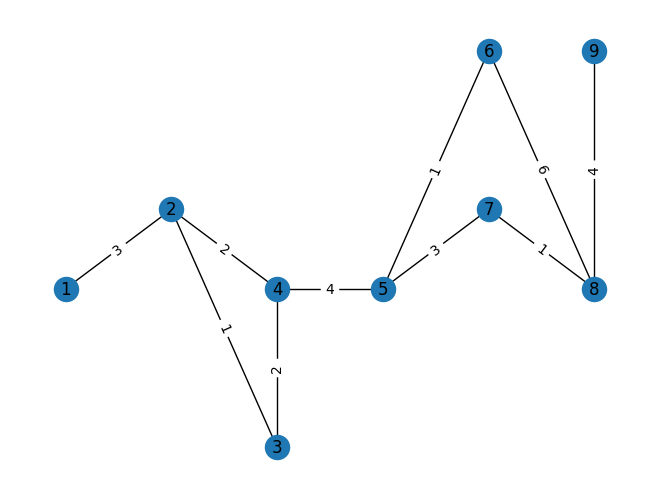

In [ ]:
G = nx.Graph()

G.add_node(1, pos=(1,1))
G.add_node(2, pos=(2,2))
G.add_node(3, pos=(3,-1))
G.add_node(4, pos=(3,1))
G.add_node(5, pos=(4,1))
G.add_node(6, pos=(5,4))
G.add_node(7, pos=(5,2))
G.add_node(8, pos=(6,1))
G.add_node(9, pos=(6,4))

G.add_edge(1,2,weight=3)
G.add_edge(2,3,weight=1)
G.add_edge(2,4,weight=2)
G.add_edge(3,4,weight=2)
G.add_edge(4,5,weight=4)
G.add_edge(5,6,weight=1)
G.add_edge(5,7,weight=3)
G.add_edge(6,8,weight=6)
G.add_edge(7,8,weight=1)
G.add_edge(8,9,weight=4)


pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

In [ ]:
import heapq

def dijkstra(graph, start, end):
    # Create a dictionary to store the distance to each node
    # Initialize all distances as infinite except for the starting node
    distance = {node: float('inf') for node in graph}
    distance[start] = 0

    # Create a dictionary to store the previous node in the optimal path
    previous_node = {node: None for node in graph}

    # Create a set to keep track of visited nodes
    visited = set()

    # Create a priority queue to store nodes to visit
    queue = [(0, start)]
    heapq.heapify(queue)

    # Loop until the queue is empty
    while queue:
        # Get the node with the smallest distance from the start node
        current_distance, current_node = heapq.heappop(queue)

        # If we have already visited this node, skip it
        if current_node in visited:
            continue

        # Add the node to the visited set
        visited.add(current_node)

        # If we have reached the end node, return the shortest path
        if current_node == end:
            path = []
            while previous_node[current_node] is not None:
                path.append(current_node)
                current_node = previous_node[current_node]
            path.append(start)
            return path[::-1], distance[end]

        # Check the distances to the neighbors of the current node
        for neighbor, weight in graph[current_node].items():
            new_distance = distance[current_node] + weight

            # If we have found a new shortest path to the neighbor node, update the distance and previous node
            if new_distance < distance[neighbor]:
                distance[neighbor] = new_distance
                previous_node[neighbor] = current_node

                # Add the neighbor node to the queue to be visited
                heapq.heappush(queue, (new_distance, neighbor))

    # If we have visited all nodes and haven't found a path to the end node, return None
    return None, None


In [ ]:
graph = {
    'A': {'B': 2, 'C': 3},
    'B': {'A': 2, 'C': 1, 'D': 1},
    'C': {'A': 3, 'B': 1, 'D': 1},
    'D': {'B': 1, 'C': 2, 'E': 4},
    'E': {'D': 4}
}

start = 'A'
end = 'E'

shortest_path, shortest_distance = dijkstra(graph, start, end)

print("Shortest Path:", shortest_path)
print("Shortest Distance:", shortest_distance)


Shortest Path: ['A', 'B', 'D', 'E']
Shortest Distance: 7


In [ ]:
graph = {
    'a': {'b': 5, 'c': 2},
    'b': {'a': 5, 'c': 7, 'd': 8},
    'c': {
        'a': 2,
        'b': 7,
        'd': 4,
        'e': 8,
        },
    'd': {
        'b': 8,
        'c': 4,
        'e': 6,
        'f': 4,
        },
    'e': {'c': 8, 'd': 6, 'f': 3},
    'f': {'e': 3, 'd': 4},
    }

start = 'a'
end = 'f'

shortest_path, shortest_distance = dijkstra(graph, start, end)

print("Shortest Path:", shortest_path)
print("Shortest Distance:", shortest_distance)


Shortest Path: ['a', 'c', 'd', 'f']
Shortest Distance: 10


In [ ]:
import math

graph = {
    'a': {'b': 5, 'c': 2},
    'b': {'a': 5, 'c': 7, 'd': 8},
    'c': {
        'a': 2,
        'b': 7,
        'd': 4,
        'e': 8,
        },
    'd': {
        'b': 8,
        'c': 4,
        'e': 6,
        'f': 4,
        },
    'e': {'c': 8, 'd': 6, 'f': 3},
    'f': {'e': 3, 'd': 4},
    }

source = 'a'
destination = 'f'

unvisited = graph
shortest_distances = {}
route = []
path_nodes = {}

for nodes in unvisited:
    shortest_distances[nodes] = math.inf
shortest_distances[source] = 0

while unvisited:
    min_node = None
    for current_node in unvisited:
        if min_node is None:
            min_node = current_node
        elif shortest_distances[min_node] \
            > shortest_distances[current_node]:
            min_node = current_node
    for (node, value) in unvisited[min_node].items():
        if value + shortest_distances[min_node] \
            < shortest_distances[node]:
            shortest_distances[node] = value \
                + shortest_distances[min_node]
            path_nodes[node] = min_node
    unvisited.pop(min_node)
node = destination

while node != source:
    try:
        route.insert(0, node)
        node = path_nodes[node]
    except Exception:
        print('Path not reachable')
        break
route.insert(0, source)

if shortest_distances[destination] != math.inf:
    print('Shortest distance is ' + str(shortest_distances[destination]))
    print('And the path is ' + str(route))

Shortest distance is 10
And the path is ['a', 'c', 'd', 'f']


In [ ]:
import geopy
#install geopython libraries
!apt install gdal-bin python-gdal python3-gdal
#install python3-rtree - Geopandas requirement
!apt install python3-rtree
#install geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#install descartes - Geopandas requirement
!pip install descartes
import geopandas

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.3 MB/s eta 0:00:00


In [ ]:
import geopandas
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("2 rue d'Alsace, Rennes, France")

In [ ]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))


Latitude = 48.122533399999995, Longitude = -1.7032299855475763
